<a href="https://colab.research.google.com/github/babatundeibukun/DEEP-LEARNING-PROJECT---COMPUTER/blob/main/practicing_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential


import matplotlib.pyplot as plt
import cv2
import os
import PIL

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/sunflowers/1043442695_4556c4c13d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/21518663809_3d69f5b995_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/175638423_058c07afb9.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4933229889_c5d9e36392.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3865206264_5d81584bba.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/353897245_5453f35a8e.jpg'),
 PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14154164774_3b39d36778.jpg'),
 PosixPath('datasets/flower_photos/roses/5212877807_a3ddf06a7c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5960270643_1b8a94822e_m.jpg')]

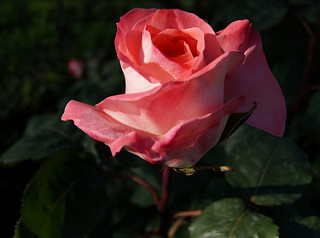

In [ ]:
PIL.Image.open(str(roses[1]))


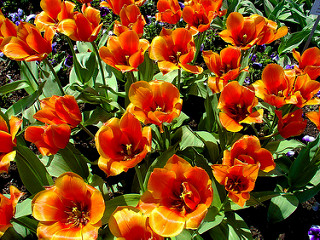

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

#Read flowers images from disk into numpy array using opencv


In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]


[PosixPath('datasets/flower_photos/roses/353897245_5453f35a8e.jpg'),
 PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14154164774_3b39d36778.jpg'),
 PosixPath('datasets/flower_photos/roses/5212877807_a3ddf06a7c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5960270643_1b8a94822e_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/353897245_5453f35a8e.jpg'

array([[[ 1, 12, 16],
        [ 2,  0, 21],
        [12,  2, 38],
        ...,
        [ 5, 16, 24],
        [ 4, 14, 24],
        [ 0, 10, 20]],

       [[ 1,  2, 22],
        [ 7,  5, 25],
        [10,  6, 31],
        ...,
        [ 5, 16, 24],
        [ 4, 14, 24],
        [ 2, 11, 21]],

       [[ 0,  3, 26],
        [ 0,  7, 22],
        [ 2,  3, 29],
        ...,
        [ 4, 13, 22],
        [ 5, 14, 24],
        [ 3, 12, 22]],

       ...,

       [[ 1,  0,  9],
        [ 1,  1,  7],
        [ 0,  0,  6],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 3,  1,  7],
        [ 3,  1,  7],
        [ 2,  1,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 2,  1,  5],
        [ 2,  1,  5],
        [ 2,  1,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
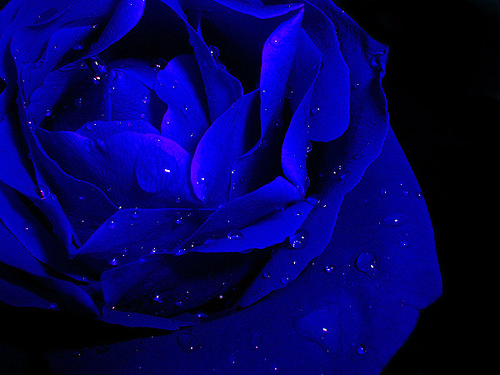

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

In [ ]:
img.shape

(375, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
import  numpy as np
X = np.array(X)
y = np.array(y)

#Lets do train test split

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Preprocessing: scale images


In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

#Build convolutional neural network and train it


In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3465 - loss: 1.5253
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6206 - loss: 0.9738
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6699 - loss: 0.8534
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7323 - loss: 0.7036
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8191 - loss: 0.5049
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9009 - loss: 0.2768
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9468 - loss: 0.1753
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9691 - loss: 0.1095
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9854 - loss: 0.0605
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9853 - loss: 0.0497
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9965 - loss: 0.0191
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy:

Obviously below is an issue of overfitting , model learned the training set so well , saw new dataset and fumbled

In [ ]:
model.evaluate(X_test_scaled,y_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6356 - loss: 2.5066


[2.4780025482177734, 0.6307189464569092]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([[ -4.488577 ,   7.9865403,  20.252665 ,   5.9386063,   6.135079 ],
       [  7.3800135,   4.8087096,  -3.5538065,  -3.8857598,   3.9643435],
       [ -1.2729067,  -1.25906  ,  12.9212675,  -3.2745316,  -2.4443944],
       ...,
       [  1.7907552,  -5.871218 ,   0.7098468,  24.07367  ,  10.627368 ],
       [ -1.4207488,   1.9670644,  11.87508  ,   2.5063057,   3.4577372],
       [ -0.143627 , -11.242246 ,   4.292304 ,  29.489035 ,   7.710433 ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[1])


In [ ]:
np.argmax(score)


0

In [ ]:
y_test[1]


0

#Improve Test Accuracy Using Data Augmentation


In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),  # Removed .experimental
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Original Image



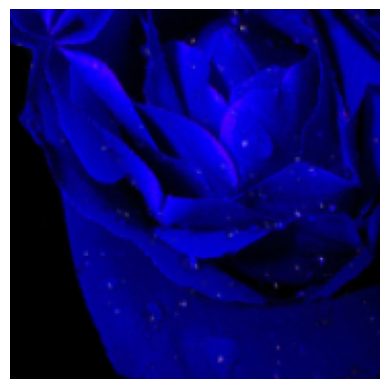

In [ ]:
#Newly generated training sample using data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

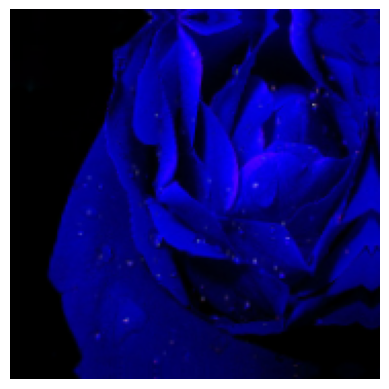

In [ ]:
#Train the model using data augmentation and a drop out layer
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

#Train the model using data augmentation and a drop out layer


In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.3253 - loss: 1.6634
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5568 - loss: 1.0938
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6248 - loss: 0.9704
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6612 - loss: 0.8868
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6930 - loss: 0.7869
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7247 - loss: 0.7390
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7043 - loss: 0.7425
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7313 - loss: 0.6740
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7412 - loss: 0.6785
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7536 - loss: 0.6521
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7401 - loss: 0.6478
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy:

In [ ]:
model.evaluate(X_test_scaled,y_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7106 - loss: 0.9939


[0.9525459408760071, 0.7069717049598694]

obviously combining dropout regularization and data augumentation make the model perform better on the test set